# Linear Regression

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from random import gauss
from lin_reg import best_line
%matplotlib inline

Slides [here](https://docs.google.com/presentation/d/1DwCvkgzA0PmdwZJAqD82QJnwcR_AnGcFM74s5QxpDkQ/edit?usp=sharing).

The idea of _correlation_ is the simple idea that variables often change _together_. For a simple example, cities with more buses tend to have higher populations.

We might observe that, as one variable X increases, so does another Y, OR that as X increases, Y decreases.

The _covariance_ describes how two variables co-vary. Note the similarity in the definition to the definition of ordinary variance:

## Covariance

For two random variables $X$ and $Y$, each with $n$ values:

$\Large\sigma_{XY} = \frac{\Sigma^n_{i = 1}(x_i - \mu_x)(y_i - \mu_y)}{n}$ <br/>

In [2]:
X = [1, 3, 5]
Y = [2, 9, 10]

# Covariance by hand:
((1-3) * (2-7) + (3-3) * (9-7) + (5-3) * (10-7)) / 3

5.333333333333333

In [6]:
# Better yet: With NumPy: (index to get covariance xy)
np.cov(X, Y, ddof=0)[0, 1]

5.333333333333333

In [5]:
#returns a matrix (2.666 is covariance of x 12.666 is covariance of y)
np.cov(X, Y, ddof=0)

array([[ 2.66666667,  5.33333333],
       [ 5.33333333, 12.66666667]])

Note that the value of the covariance is very much a function of the values of X and Y, which can make interpretation difficult. What is wanted is a _standardized_ scale for covariance, hence: _correlation_.

## Correlation

Pearson Correlation:<br/>$\Large r_P = \frac{\Sigma^n_{i = 1}(x_i - \mu_x)(y_i - \mu_y)}{\sqrt{\Sigma^n_{i = 1}(x_i - \mu_x)^2\Sigma^n_{i = 1}(y_i -\mu_y)^2}}$

Note that we are simply standardizing the covariance by the standard deviations of X and Y (the ($n-1$)'s cancel!).

$\bf{Check}$:

<details><summary>
What happens if X = Y?
</summary>
Then numerator = denominator and the correlation = 1!
</details>
<br/>
We'll always have $-1 \leq r \leq 1$. (This was the point of standardizing by the standard deviations of X and Y.)

A correlation of -1 means that X and Y are perfectly negatively correlated, and a correlation of 1 means that X and Y are perfectly positively correlated.

NumPy also has a correlation method:

In [7]:
np.corrcoef(X, Y)

array([[1.        , 0.91766294],
       [0.91766294, 1.        ]])

In [8]:
np.corrcoef(X, Y)[0, 1] == (np.cov(X, Y, ddof=0) / (np.std(X) * np.std(Y)))[0, 1]

True

## Causation

_Why_ does it happen that variables correlate? It _may_ be that one is the cause of the other. A city having a high population, for example, probably does have some causal effect on the number of buses that the city has. But this _need not_ be the case, and that is why statisticians are fond of saying that 'correlation is not causation'. An alternative possibility, for example, is that high values of X and Y are _both_ caused by high values of some third factor Z. The size of children's feet, for example, is correlated with their ability to spell, but this is of course NOT because either is a cause of the other. Rather, BOTH are caused by the natural maturing and development of children. As they get older, both their feet and their spelling abilities grow!

## Statistical Learning Theory

It's important at this point to understand the distinction between dependent and independent variables.

Roughly, the independent variable is what can be directly manipulated and the dependent variable is what cannot be (but is nevertheless of great interest). What matters structurally is simply that we understand the dependent variable to be a _function_ of the independent variable(s).

This is the proper interpretation of a statistical _model_.

Simple idea: We can model correlation with a _line_. As one variable changes, so does the other.

This model has two *parameters*: *slope* and *y-intercept*.

Unless there's a perfectly (and suspiciously) linear relationship between our predictor(s) and our target, there will  be some sort of **error** or **loss** or **residual**. The best-fit line is constructed by minimizing the sum of the squares of these losses.

## Simple Linear Regression

The solution for a simple regression best-fit line is as follows:

- slope: <br/>$\Large m = r_P\frac{\sigma_y}{\sigma_x}$

- y-intercept:<br/> $\Large b = \mu_y - m\mu_x$

Note: The proof of this proceeds by setting the gradient of the loss function equal to 0.

Assumptions:

1. The relationship between target and predictor(s) is linear. (Of course!)
2. The errors are mutually independent. (That is, there is no correlation between any two errors.)
3. The errors are normally distributed. (That is, smaller errors are more probable than larger errors, according to the familiar bell curve.)
4. The errors are homoskedastic. (That is, the errors have the same variance. The Greek word $\sigma\kappa\epsilon\delta\acute{\alpha}\nu\nu\upsilon\mu\iota$ means "to scatter".)

There is no general requirement that the predictors and the target *themselves* be normally distributed. However: Linear regression can work better if the predictors are normally distributed.

[Here](https://www.statisticssolutions.com/assumptions-of-linear-regression/) is a helpful resource on the assumptions of linear regression.

Experiment: [Playing with regression line](https://www.desmos.com/calculator/jwquvmikhr) <br/>
Limitations: [Anscombe's Quartet](https://www.desmos.com/calculator/paknt6oneh)

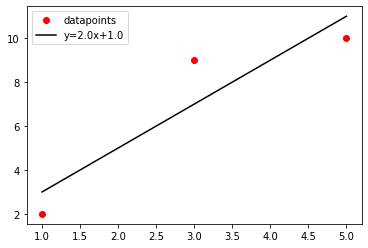

In [9]:
# Using best_line

best_line(X, Y)

## Multiple Linear Regression

The main idea here is pretty simple. Whereas, in simple linear regression we took our dependent variable to be a function only of a single independent variable, here we'll be taking the dependent variable to be a function of multiple independent variables.

Our regression equation, then, instead of looking like $\hat{y} = mx + b$, will now look like:

$\hat{y} = \hat{\beta}_0 + \hat{\beta}_1x_1 + ... + \hat{\beta}_nx_n$.

Remember that the hats ( $\hat{}$ ) indicate parameters that are estimated.

Is this still a best-fit *line*? Well, no. What does the graph of, say, z = x + y look like? [Here's](https://academo.org/demos/3d-surface-plotter/) a 3d-plotter. (Of course, once we get x's with subscripts beyond 2 it's going to be very hard to visualize. But in practice linear regressions can make use of dozens or even of hundreds of independent variables!)

I want to focus here more on what coding a multiple regression looks like in Python. But you might be wondering: Is it possible to calculate the betas by hand?

Yes! See [here](https://stattrek.com/multiple-regression/regression-coefficients.aspx) for a nice explanation and example.

We'll focus more directly on matrix mathematics later in the course.

## Dealing with Categorical Variables

One issue we'd like to resolve is what to do with categorical variables, i.e. variables that represent categories rather than continua. In a Pandas DataFrame, these columns may well have strings or objects for values, but they need not. A certain heart-disease dataset from Kaggle, for example, has a target variable that takes values 0-4, each representing a different stage of heart disease.

### Dummying

One very effective way of dealing with categorical variables is to dummy them out. What this involves is making a new column for _each categorical value in the column we're dummying out_.

These new columns will be filled only with 0's and 1's, a 1 representing the presence of the relevant categorical value.

Let's look at a simple example:

In [10]:
comma_use = pd.read_csv('data/comma-survey.csv')

For more on this dataset see [here](https://fivethirtyeight.com/features/elitist-superfluous-or-popular-we-polled-americans-on-the-oxford-comma/).

In [11]:
comma_use.head()

,RespondentID,"In your opinion, which sentence is more gramatically correct?","Prior to reading about it above, had you heard of the serial (or Oxford) comma?","How much, if at all, do you care about the use (or lack thereof) of the serial (or Oxford) comma in grammar?",How would you write the following sentence?,"When faced with using the word ""data"", have you ever spent time considering if the word was a singular or plural noun?","How much, if at all, do you care about the debate over the use of the word ""data"" as a singluar or plural noun?","In your opinion, how important or unimportant is proper use of grammar?",Gender,Age,Household Income,Education,Location (Census Region)
0,3292953864,"It's important for a person to be honest, kind...",Yes,Some,"Some experts say it's important to drink milk,...",No,Not much,Somewhat important,Male,30-44,"$50,000 - $99,999",Bachelor degree,South Atlantic
1,3292950324,"It's important for a person to be honest, kind...",No,Not much,"Some experts say it's important to drink milk,...",No,Not much,Somewhat unimportant,Male,30-44,"$50,000 - $99,999",Graduate degree,Mountain
2,3292942669,"It's important for a person to be honest, kind...",Yes,Some,"Some experts say it's important to drink milk,...",Yes,Not at all,Very important,Male,30-44,NaN,NaN,East North Central
3,3292932796,"It's important for a person to be honest, kind...",Yes,Some,"Some experts say it's important to drink milk,...",No,Some,Somewhat important,Male,18-29,NaN,Less than high school degree,Middle Atlantic
4,3292932522,"It's important for a person to be honest, kind...",No,Not much,"Some experts say it's important to drink milk,...",No,Not much,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
comma_use.shape

In [ ]:
comma_use.dropna(inplace=True)

In [ ]:
comma_use.shape

In [ ]:
# Let's try using sklearn's OneHotEncoder to create our dummy columns:

from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(drop='first')
comma_trans = ohe.fit_transform(comma_use.drop('RespondentID', axis=1))

Could we have used ```pd.get_dummies()``` instead?

Well, yes. And in fact ```get_dummies()``` is in some ways easier; for one thing, it's built right into Pandas. But there are drawbacks with it as well. See the *bottom* of [this link](https://stackoverflow.com/questions/36631163/pandas-get-dummies-vs-sklearns-onehotencoder-what-are-the-pros-and-cons) for a good explanation.

So what did the encoder do?

In [ ]:
comma_trans.todense()

In [ ]:
ohe.get_feature_names()

In [ ]:
df = pd.DataFrame(comma_trans.todense(), columns=ohe.get_feature_names())
df.head()

## Wine Dataset

In [2]:
wine = pd.read_csv('data/wine.csv')

In [3]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red_wine
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [4]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
fixed acidity           6497 non-null float64
volatile acidity        6497 non-null float64
citric acid             6497 non-null float64
residual sugar          6497 non-null float64
chlorides               6497 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6497 non-null float64
sulphates               6497 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null int64
red_wine                6497 non-null int64
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


In [5]:
wine.quality.value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

## Model Selection

Let's imagine that I'm going to try to predict wine quality based on the other features.

Now: Which columns (predictors) should I choose? There are 12 predictors I could choose from For each of these predictors, I could either use it or not use it in my model, which means that there are 2^12 = 4096 different models I could construct! Well, okay, one of these is the "empty model" with no predictors in it. But there are still 4095 models from which I can choose.

How can I decide which predictors to use in my model?

We'll explore a few methods here. For more on feature selection, see [this post](https://towardsdatascience.com/the-5-feature-selection-algorithms-every-data-scientist-need-to-know-3a6b566efd2).

### Correlation

In [6]:
# Use the .corr() DataFrame method to find out about the
# correlation values between all pairs of variables!

wine.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red_wine
fixed acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,-0.076743,0.486740
volatile acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,-0.265699,0.653036
citric acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,0.085532,-0.187397
residual sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.036980,-0.348821
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,-0.200666,0.512678
free sulfur dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,0.055463,-0.471644
total sulfur dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.041385,-0.700357
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,-0.305858,0.390645
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.019506,0.329129
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,0.038485,0.487218


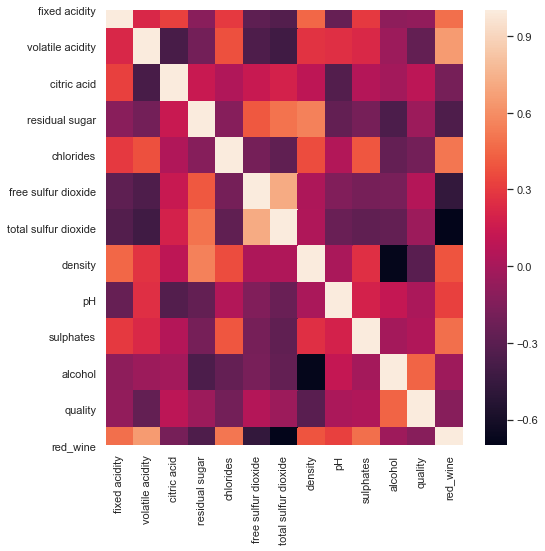

In [7]:
import seaborn as sns
sns.set(rc={'figure.figsize':(8, 8)})

# Use the .heatmap method to depict the relationships visually!
sns.heatmap(wine.corr());

In [8]:
# Let's look at the correlations with 'quality'
# (our dependent variable) in particular.

wine.corr()['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.444319
citric acid             0.085532
free sulfur dioxide     0.055463
sulphates               0.038485
pH                      0.019506
residual sugar         -0.036980
total sulfur dioxide   -0.041385
fixed acidity          -0.076743
red_wine               -0.119323
chlorides              -0.200666
volatile acidity       -0.265699
density                -0.305858
Name: quality, dtype: float64

In [9]:
# Let's choose 'alcohol' and 'density'.

wine_preds = wine[['alcohol', 'density']]
wine_target = wine['quality']

## Multiple Regression in StatsModels

Statsmodels offers a highly descriptive report of the fit of a regression model. Let's generate a simple regression and then analyze the report!

In [10]:
import statsmodels.api as sm

First let's try data that fit a straight line perfectly:

In [13]:
x = np.arange(20)
y = 3*x + 1         # Note that we can do this only because x is a NumPy array!

model1 = sm.OLS(y, sm.add_constant(x)).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.500e+31
Date:                Thu, 27 Feb 2020   Prob (F-statistic):          4.87e-275
Time:                        10:13:25   Log-Likelihood:                 614.55
No. Observations:                  20   AIC:                            -1225.
Df Residuals:                      18   BIC:                            -1223.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0000   4.97e-15   2.01e+14      0.000       1.000       1.000
x1             3.0000   4.47e-16   6.71e+15      0.000       3.000       3.000
==============================================================================
Omnibus:                        2.828   Durbin-Watson:                   0.071
Prob(Omnibus):                  0.243   Jarque-Bera (JB):                1.202
Skew:                           0.046   Prob(JB):                        0.548
Kurtosis:                       1.803   Cond. No.                         21.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

$\rightarrow$Now let's add a little noise:

In [14]:
x = np.arange(20)
y = np.array([3*pt + 1 + gauss(mu=0, sigma=5) for pt in x])

In [15]:
df2 = pd.DataFrame(columns=['x', 'y'])

df2['x'] = x
df2['y'] = y

In [17]:
# model = sm.formula.ols(formula='y ~ x1 + x2 + x3 ..', data=df2).fit()
model = sm.formula.ols(formula='y~x', data=df2).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     241.8
Date:                Thu, 27 Feb 2020   Prob (F-statistic):           7.05e-12
Time:                        10:17:44   Log-Likelihood:                -59.975
No. Observations:                  20   AIC:                             124.0
Df Residuals:                      18   BIC:                             125.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1859      2.205      0.084      0.934      -4.447       4.818
x              3.0853      0.198     15.550      0.000       2.668       3.502
==============================================================================
Omnibus:                        0.168   Durbin-Watson:                   2.523
Prob(Omnibus):                  0.919   Jarque-Bera (JB):                0.209
Skew:                          -0.174   Prob(JB):                        0.901
Kurtosis:                       2.640   Cond. No.                         21.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Please note the difference between `sm.OLS()` and `sm.formula.ols()`!

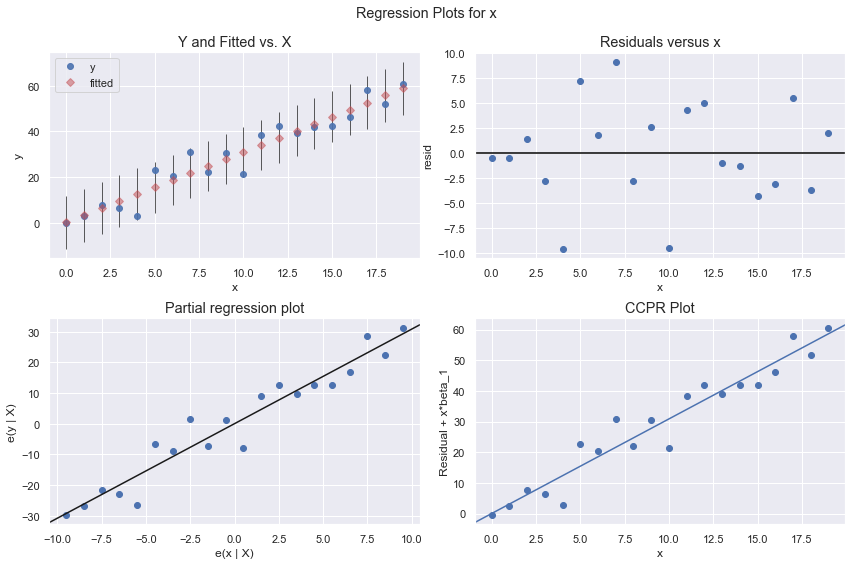

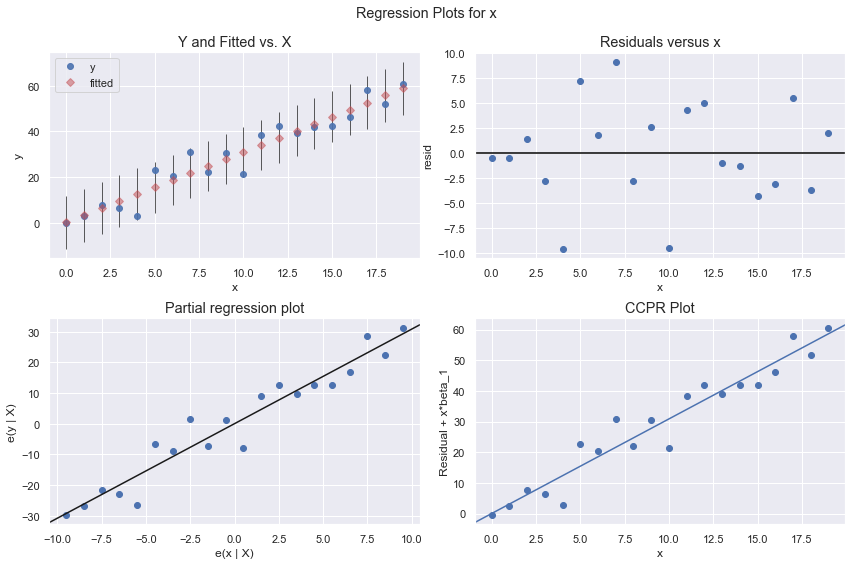

In [18]:
sm.graphics.plot_regress_exog(model, 'x', fig=plt.figure(figsize=(12, 8)))

In [19]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     241.8
Date:                Thu, 27 Feb 2020   Prob (F-statistic):           7.05e-12
Time:                        10:20:46   Log-Likelihood:                -59.975
No. Observations:                  20   AIC:                             124.0
Df Residuals:                      18   BIC:                             125.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1859      2.205      0.084      0.934      -4.447       4.818
x              3.0853      0.198     15.550      0.000       2.668       3.502
==============================================================================
Omnibus:                        0.168   Durbin-Watson:                   2.523
Prob(Omnibus):                  0.919   Jarque-Bera (JB):                0.209
Skew:                          -0.174   Prob(JB):                        0.901
Kurtosis:                       2.640   Cond. No.                         21.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

How do we interpret this report?

## Coefficient of Determination

Very often a data scientist will calculate $R^2$, the *coefficient of determination*, as a measure of how well the model fits the data.

$R^2$ for a model is ultimately a _relational_ notion. It's a measure of goodness of fit _relative_ to a (bad) baseline model. This bad baseline model is simply the horizontal line $y = \mu_Y$, for dependent variable $Y$.

The actual calculation of $R^2$ is: <br/> $\Large R^2\equiv 1-\frac{\Sigma_i(y_i - \hat{y}_i)^2}{\Sigma_i(y_i - \bar{y})^2}$.

$R^2$ is a measure of how much variation in the dependent variable your model explains.

### Adjusted $R^2$

There are some theoretical [objections](https://data.library.virginia.edu/is-r-squared-useless/) to using $R^2$ as an evaluator of a regression model.

One objection is that, if we add another predictor to our model, $R^2$ can only *increase*! (It could hardly be that with more features I'd be able to account for *less* of the variation in the dependent variable than I could with the smaller set of features.)

One improvement is **adjusted $R^2$**: <br/> $\Large R^2_{adj.}\equiv 1 - \frac{(1 - R^2)(n - 1)}{n - m - 1}$, where:

- n is the number of data points; and
- m is the number of predictors.

This can be a better indicator of the quality of a regression model. For more, see [here](https://www.statisticshowto.datasciencecentral.com/adjusted-r2/).

Note that $R^2$ *can* be negative!

In [20]:
from sklearn.datasets import make_regression
from sklearn.metrics import r2_score

X, y = make_regression()

bad_pred = np.mean(y) * np.ones(len(y))
worse_pred = (np.mean(y) - 100) * np.ones(len(y))

print(r2_score(y, bad_pred))
print(r2_score(y, worse_pred))

0.0
-0.26773786642447206


## Other Regression Statistics

What else do we have in this report?

- **F-statistic**: The F-test measures the significance of your model relative to a model in which all coefficients are 0, i.e. relative to a model that says there is no correlation whatever between the predictors and the target. <br/><br/>
- **Log-Likelihood**: The probability in question is the probability of seeing these data points, *given* the model parameter values. The higher this is, the more our data conform to our model and so the better our fit. AIC and BIC are related to the log-likelihood; we'll talk about those later. <br/><br/>
- **coef**: These are the betas as calculated by the least-squares regression. We also have p-values and 95%-confidence intervals. <br/><br/>
- **Omnibus**: This is a test for error normality. The probability is the chance that the errors are normally distributed. <br/><br/>
- **Durbin-Watson**: This is a test for error homoskedasticity. We're looking for values between ~1.5 and ~2.5. <br/><br/>
- **Jarque-Bera**: This is another test for error normality. <br/><br/>
- **Cond. No.**: The condition number tests for independence of the predictors. Lower scores are better. When the predictors are *not* independent, we can run into problems of multicollinearity. For more on the condition number, see [here](https://stats.stackexchange.com/questions/168259/how-do-you-interpret-the-condition-number-of-a-correlation-matrix).

For more on statsmodels regression statistics, see [here](https://www.accelebrate.com/blog/interpreting-results-from-linear-regression-is-the-data-appropriate).

## Multicollinearity

Multicollinearity describes the correlation between distinct predictors. Why might high multicollinearity be a problem for interpreting a linear regression model?

It's problematic for statistics in an inferential mode because, if $x_1$ and $x_2$ are highly correlated with $y$ but also *with each other*, then it will be very difficult to tease apart the effects of $x_1$ on $y$ and the effects of $x_2$ on $y$. If I really want to have a good sense of the effect of $x_1$ on $y$, then I'd like to vary $x_1$ while keeping the other features constant. But if $x_1$ is highly correlated with $x_2$ then this will be a practically impossible exercise!

We will return to this topic again. For more, see [this post](https://towardsdatascience.com/https-towardsdatascience-com-multicollinearity-how-does-it-create-a-problem-72956a49058).

## Scaling

Before we construct a linear regression, let's *scale* our columns by z-scores. Why?

In a word, it's useful to have all of our variables be on the same scale, so that the resulting coefficients are easier to interpret. If, moreover, the scales of the variables are very different one from another, then some of the coefficients may end up on very large or very tiny scales.

For more on this, see [this post](https://stats.stackexchange.com/questions/32649/some-of-my-predictors-are-on-very-different-scales-do-i-need-to-transform-them).

In [22]:
wine_preds_scaled = (wine_preds - np.mean(wine_preds)) / np.std(wine_preds)

Let's try a model with our wine dataset now.

In [23]:
predictors = sm.add_constant(wine_preds_scaled)
model = sm.OLS(wine_target, predictors).fit()
model.summary()

/Users/sam/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.197
Model:                            OLS   Adj. R-squared:                  0.197
Method:                 Least Squares   F-statistic:                     798.7
Date:                Thu, 27 Feb 2020   Prob (F-statistic):          7.48e-311
Time:                        10:44:49   Log-Likelihood:                -7623.4
No. Observations:                6497   AIC:                         1.525e+04
Df Residuals:                    6494   BIC:                         1.527e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.8184      0.010    599.385      0.000       5.799       5.837
alcohol        0.3872      0.013     28.991      0.000       0.361       0.413
density       -0.0012      0.013     -0.090      0.929      -0.027       0.025
==============================================================================
Omnibus:                      123.912   Durbin-Watson:                   1.636
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              258.761
Skew:                           0.031   Prob(JB):                     6.47e-57
Kurtosis:                       3.976   Cond. No.                         2.32
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
wine_preds2 = wine[['alcohol', 'density', 'volatile acidity']]

wine_preds2_scaled = (wine_preds2 - np.mean(wine_preds2)) / np.std(wine_preds2)

In [25]:
predictors = sm.add_constant(wine_preds2_scaled)
model = sm.OLS(np.asarray(wine_target), predictors).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.267
Model:                            OLS   Adj. R-squared:                  0.267
Method:                 Least Squares   F-statistic:                     789.6
Date:                Thu, 27 Feb 2020   Prob (F-statistic):               0.00
Time:                        10:45:10   Log-Likelihood:                -7327.4
No. Observations:                6497   AIC:                         1.466e+04
Df Residuals:                    6493   BIC:                         1.469e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                5.8184      0.009    627.273      0.000       5.800       5.837
alcohol              0.4562      0.013     34.935      0.000       0.431       0.482
density              0.1128      0.014      8.321      0.000       0.086       0.139
volatile acidity    -0.2454      0.010    -24.887      0.000      -0.265      -0.226
==============================================================================
Omnibus:                      115.319   Durbin-Watson:                   1.653
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              235.492
Skew:                          -0.002   Prob(JB):                     7.30e-52
Kurtosis:                       3.933   Cond. No.                         2.53
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Multiple Regression in Scikit-Learn

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics

In [29]:
# Let's create a StandardScaler object to scale our data for us.
ss = StandardScaler()


# Now we'll apply it to our data by using the .fit() and .transform() methods.

ss.fit(wine_preds2)

wine_preds2_scaled = ss.transform(wine_preds2)
wine_preds2_scaled

array([[-0.91546416,  1.03499282,  2.18883292],
       [-0.58006813,  0.70148631,  3.28223494],
       [-0.58006813,  0.76818761,  2.55330026],
       ...,
       [-0.91546416, -0.71925142, -0.6054167 ],
       [ 1.9354021 , -2.00325148, -0.30169391],
       [ 1.09691202, -1.7631268 , -0.78765037]])

In [30]:
# Now we can fit a LinearRegression object to our training data!

lr = LinearRegression()
lr.fit(wine_preds2_scaled, wine_target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [31]:
# We can use the .coef_ attribute to recover the results
# of the regression.

lr.coef_

array([ 0.45621134,  0.11281645, -0.24544025])

In [32]:
lr.intercept_

5.818377712790519

## Recursive Feature Elimination

The idea behind recursive feature elimination is to start with all predictive features and then build down to a small set of features slowly, by eliminating the features with the lowest coefficients.

That is:
1. Start with a model with _all_ $n$ predictors;
2. find the predictor with the smallest coefficient;
3. throw that predictor out and build a model with the remining $n-1$ predictors;
4. set $n = n-1$ and repeat until $n-1$ has the value you want!

### Recursive Feature Elimination in Scikit-Learn

In [ ]:
from sklearn.feature_selection import RFE

lr_rfe = LinearRegression()
select = RFE(lr_rfe, n_features_to_select=1)
select = select.fit(X = wine.drop('quality', axis=1), y = wine['quality'])

select.support_

In [ ]:
select.ranking_

Caution: RFE is probably not a good strategy if your initial dataset has many predictors. It will likely be easier to start with a *simple* model and then slowly increase its complexity. This is also good advice for when you're first getting your feet wet with `sklearn`!

## Feature Engineering

Sometimes we can get better performance if we multiply features together. Consider the following dataset:

In [33]:
sales = pd.read_csv('data/Advertising.csv', index_col=0)

sales.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


We'd like to try to understand sales as a function of spending on various media (TV, radio, newspaper). We could check correlations of sales with the different features:

In [34]:
sales.corr()['sales']

TV           0.782224
radio        0.576223
newspaper    0.228299
sales        1.000000
Name: sales, dtype: float64

The correlation with TV spending is pretty high. But look what happens when we add a new column:

In [35]:
sales['TV+Radio'] = sales['TV'] * sales['radio']

In [36]:
sales.corr()['sales']['TV+Radio']

0.9639320459920486

The correlation here is amazing! Let's make ourselves a plot:

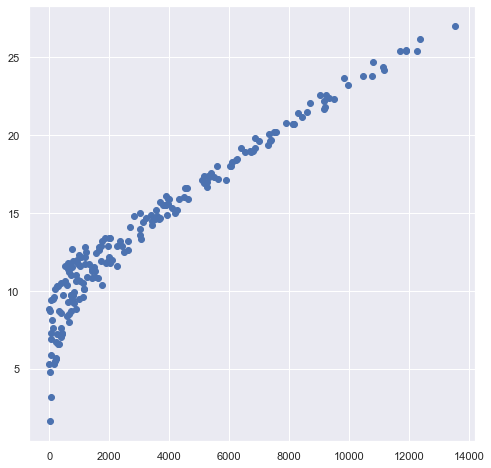

In [37]:
fig, ax = plt.subplots()
ax.scatter(sales['TV+Radio'], sales['sales']);

In practice, it's not easy to tell when such products of features will be so fruitful. Moreover, there is room for concern about violating regression's demand for feature independence. At the very least, we would probably not want to include a product *and the individual features themselves* in a final model, not if our goal is to understand what's really responsible for fluctuations in our target variable.

## Sklearn Metrics

The metrics module in sklearn has a number of metrics that we can use to meaure the accuracy of our model, including the $R^2$ score, the mean absolute error and the mean squared error. Note that the default 'score' on our model object is the $R^2$ score. Let's go back to our wine dataset:

In [38]:
metrics.r2_score(wine_target, lr.predict(wine_preds2_scaled))

0.26730861585028187

Let's make sure this metric is properly calibrated. If we put simply $\bar{y}$ as our prediction, then we should get an $R^2$ score of *0*. And if we predict, say, $\bar{y} + 1$, then we should get a *negative* $R^2$ score.

In [39]:
avg_quality = np.mean(wine_target)
num = len(wine_target)

metrics.r2_score(wine_target, avg_quality * np.ones(num))

0.0

In [ ]:
metrics.r2_score(wine_target, (avg_quality + 1) * np.ones(num))

In [ ]:
metrics.mean_absolute_error(Y_test, lr.predict(X_test))

In [ ]:
metrics.mean_squared_error(Y_test, lr.predict(X_test))

## Visualization of Error

In [40]:
# Adjusting X so that the intercept term of the best-fit line will be 0
X = np.array([1.5, 3.5, 5.5])
Y = np.array([2, 9, 10])

model = LinearRegression().fit(X.reshape(-1, 1), Y)

In [41]:
model.coef_

array([2.])

In [42]:
model.intercept_

1.7763568394002505e-15

In [43]:
def sse(m):
    line = m*X
    err = sum(x**2 for x in [line - model.predict(X.reshape(-1, 1))])
    return sum(err)

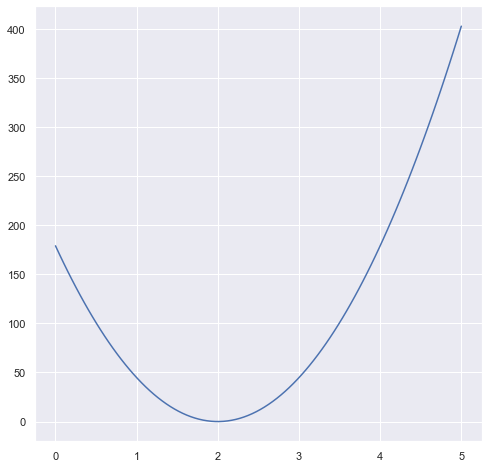

In [44]:
fig, ax = plt.subplots()

ms = np.linspace(0, 5, 100)
ys = [sse(m) for m in ms]

ax.plot(ms, ys);

In [45]:
# Going 3d to plot error as a function of both m and b
from mpl_toolkits import mplot3d

In [46]:
def new_sse(m, x, b, y):
    """
    This function returns the sum of squared errors for
    a target y and a linear estimate mx + b.
    """
    return len(x) * metrics.mean_squared_error(y, m*x + b)

In [47]:
# Going back to our original example
X_sample = np.array([1, 3, 5])
Y_sample = np.array([2, 9, 10])

# This should be our minimum error
new_sse(2, X_sample, 1, Y_sample)

6.0

In [48]:
ms = np.linspace(-3, 7, 100)
bs = np.linspace(-5, 5, 100)

X_grid, Y_grid = np.meshgrid(ms, bs)

Z = np.array([[new_sse(m, X_sample, b, Y_sample) for m in ms] for b in bs])

In [49]:
m_errs = {}
for m in ms:
    m_errs[m] = new_sse(m, X_sample, 1, Y_sample)
print(min(m_errs.values()))
for k in m_errs:
    if m_errs[k] == min(m_errs.values()):
        print(k)

6.089276604428118
1.9494949494949498
2.05050505050505


In [50]:
b_errs = {}
for b in bs:
    b_errs[b] = new_sse(2, X_sample, b, Y_sample)
print(min(b_errs.values()))
for k in b_errs:
    if b_errs[k] == min(b_errs.values()):
        print(k)

6.004897459442912
0.9595959595959593


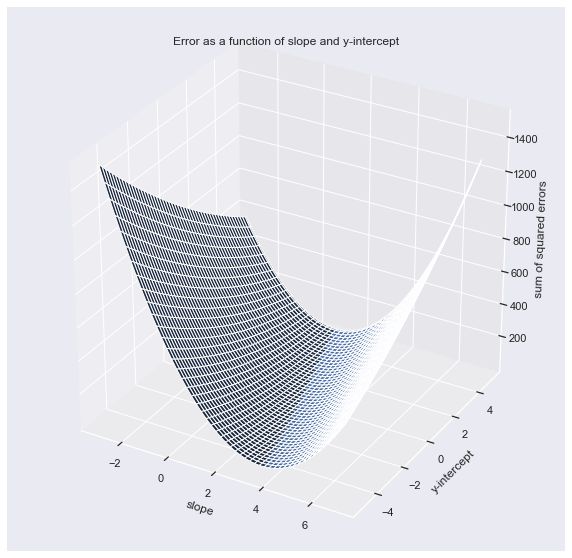

In [51]:
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')
ax.plot_surface(X_grid, Y_grid, Z)
ax.set_xlabel('slope')
ax.set_ylabel('y-intercept')
ax.set_zlabel('sum of squared errors')
plt.title('Error as a function of slope and y-intercept');

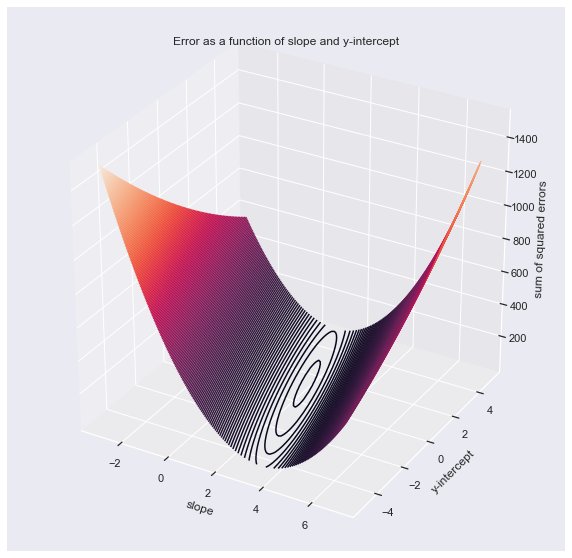

In [52]:
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')
ax.contour3D(X_grid, Y_grid, Z, 200)
ax.set_xlabel('slope')
ax.set_ylabel('y-intercept')
ax.set_zlabel('sum of squared errors')
plt.title('Error as a function of slope and y-intercept');

## Regression on Comma Dataset

In [53]:
comma_use.columns

NameError: name 'comma_use' is not defined

In [54]:
df.columns

NameError: name 'df' is not defined

In [ ]:
# We'll try to predict the first column of df: the extent to which the person accepts the sentence
# without the Oxford comma as more grammatically correct.

comma_target = df['x0_It\'s important for a person to be honest, kind and loyal.']

comma_predictors = df[['x8_18-29', 'x8_30-44',
       'x8_45-60', 'x8_> 60', 'x9_$0 - $24,999', 'x9_$100,000 - $149,999',
       'x9_$150,000+', 'x9_$25,000 - $49,999', 'x9_$50,000 - $99,999']]

comma_lr = LinearRegression()

comma_lr.fit(comma_predictors, comma_target)

In [ ]:
comma_lr.score(comma_predictors, comma_target)

In [ ]:
comma_lr.coef_

In [ ]:
df.corr()['x0_It\'s important for a person to be honest, kind and loyal.']